Calculating result for row 1 of total 170
Calculating result for row 2 of total 170
Calculating result for row 3 of total 170
Calculating result for row 4 of total 170
Calculating result for row 5 of total 170
Calculating result for row 6 of total 170
Calculating result for row 7 of total 170
Calculating result for row 8 of total 170
Calculating result for row 9 of total 170
Calculating result for row 10 of total 170
Calculating result for row 11 of total 170
Calculating result for row 12 of total 170
Calculating result for row 13 of total 170
Calculating result for row 14 of total 170
Calculating result for row 15 of total 170
Calculating result for row 16 of total 170
Calculating result for row 17 of total 170
Calculating result for row 18 of total 170
Calculating result for row 19 of total 170
Calculating result for row 20 of total 170
Calculating result for row 21 of total 170
Calculating result for row 22 of total 170
Calculating result for row 23 of total 170
Calculating result f

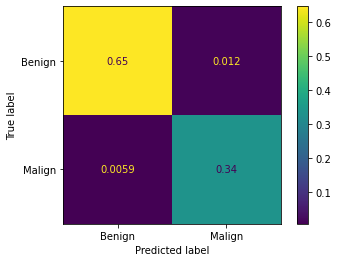

In [60]:
import numpy as np
import pandas as pd
import math
import operator
import datetime
import random 
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


execution_start = datetime.datetime.now()
distance_calculation_method = 1 #1 minkowski #other Euclidean
accuracy_score = np.array([])
precision_score = np.array([])
recall_score = np.array([])

dataCsv = pd.read_csv("data/breast-cancer.csv")
dataframe = dataCsv.fillna(dataCsv.mean()).drop(
    [203, 433, 549]).drop(columns=['ID'])
dataframe['Diagnosis'].replace('M', 1, inplace=True)
dataframe['Diagnosis'].replace('B', 0, inplace=True)

test_df = dataframe.sample(frac=0.3)
#test_df = np.concatenate(test_df[['Diagnosis']].to_numpy(), axis=0)

training_df = dataframe.sample(frac=0.7)
#traning_df_pred = np.concatenate(training_df[['Diagnosis']].to_numpy(), axis=0)

def minkowski_distance(a, b, p):
    return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

def calculate_euclidean_distance_between_dataframe_rows(test_dataframe_row, training_dataframe_row, column_count):
    distanceSum = 0
    for column in range(0, column_count):
        distanceSum += math.pow(test_dataframe_row[column] -
                                training_dataframe_row[column], 2)
    return math.sqrt(distanceSum)


def knn(training_dataframe, testing_dataframe_row, K):
    distances = {}

    for index in range(len(training_dataframe)):
        distance = 0 
        if (distance_calculation_method ==1):
            distance = minkowski_distance (
            testing_dataframe_row,
            training_dataframe.iloc[index], 1.5) 
        else: 
            distance = calculate_euclidean_distance_between_dataframe_rows(
                testing_dataframe_row,
                training_dataframe.iloc[index],
                training_dataframe.shape[1])
        distances[index] = distance

    neighbors = sorted(distances, key=distances.get)[:K]

    is_cancer_qtd, is_not_cancer_qtd = 0, 0
    for row_index in neighbors:
        if training_dataframe.iloc[row_index]['Diagnosis'] == 0.0:
            is_not_cancer_qtd += 1
        else: 
            is_cancer_qtd += 1

    return 1 if is_cancer_qtd > is_not_cancer_qtd else 0


correctAnswers, totalAnswers, wrongAnswers, K = 5, len(test_df), 0, 5
#answersArray = {}
answersArray = np.array([], int)
for index in range(len(test_df)):
    print(f'Calculating result for row {index+1} of total {len(test_df)}')
    testing_row = test_df.iloc[index]
    cancer_result = knn(training_df, testing_row, K)
    #answersArray[index] = cancer_result
    answersArray = np.append (answersArray, cancer_result)  
    # print(testing_row['Diagnosis'])
    #print('Cancer\n' if cancer_result == 1 else 'Not cancer \n')
    if testing_row['Diagnosis'] == cancer_result:
        correctAnswers += 1
wrongAnswers = totalAnswers - correctAnswers

y_test = test_df['Diagnosis'].to_numpy()

#print(type(y_test))

#print(y_test.size)
#print(y_test)

#print()

#print(type(answersArray))

#print(answersArray.size)
#print(answersArray)
execution_finish = datetime.datetime.now()
print("Execution Time:",execution_finish - execution_start)
print("Accuracy:",metrics.accuracy_score(y_test, answersArray ))
print("Precision:",metrics.precision_score(y_test, answersArray, average="weighted"))
print("Recall:",metrics.recall_score(y_test, answersArray, average="weighted"))
print("F-1 Score:",f1_score(y_test, answersArray, average='micro'))
confusion_matrix(y_test, answersArray)

cm = confusion_matrix(y_test, answersArray, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign','Malign'])
cmd.plot()